In [1]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width=10, repr.plot.height=5, repr.plot.dpi=300)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 7: NHANES and CVD

In [2]:
library(nhanesA)
demo_df <- nhanes('DEMO_J')
# head(demo_df)
nhanesTableVars('DEMO', 'DEMO_J')

,Variable.Name,Variable.Description
,<chr>,<chr>
1,AIALANGA,Language of the MEC ACASI Interview Instrument
2,DMDBORN4,In what country {were you/was SP} born?
3,DMDCITZN,{Are you/Is SP} a citizen of the United States? [Information about citizenship is being collected by the U.S. Public Health Serv
4,DMDEDUC2,What is the highest grade or level of school {you have/SP has} completed or the highest degree {you have/s/he has} received?
5,DMDEDUC3,What is the highest grade or level of school {you have/SP has} completed or the highest degree {you have/s/he has} received?
6,DMDFMSIZ,Total number of people in the Family
7,DMDHHSIZ,Total number of people in the Household
8,DMDHHSZA,Number of children aged 5 years or younger in the household
9,DMDHHSZB,Number of children aged 6-17 years old in the household


## Assessing CVD in NHANES
- The report asks you to use NHANES to study cardiovascular disease (CVD).
- CVD is an umbrella term for several different conditions, including: coronary artery disease, peripheral artery disease, heart failure, hypertension.
- Diagnosis: Involves a combination of clinical assessment, laboratory tests, and imaging:
  - Clinical assessment: patient history, physical examination
  - Lab tests: Blood tests to measure cholesterol, glucose, and other markers
  - Imaging: Echocardiogram, angiogram, CT scans, and MRIs to visualize heart and vascular system
- **Not all of these are measured in NHANES, but many things that are correlated with them are**.

In [3]:
nhanesSearch("cardio", ystart=2001, ystop=2008, nchar=50)

Variable.Name,Variable.Description,Data.File.Name,Data.File.Description,Begin.Year,EndYear,Component,Use.Constraints
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CVDEXCL2,Excluded from exam due to selected cardiovascular,CVX_C,Cardiovascular Fitness,2003,2004,Examination,None
CVDEXCL2,Excluded from exam due to selected cardiovascular,CVX_B,Cardiovascular Fitness,2001,2002,Examination,None


## Determining CVD risk from NHANES
- A number of studies have used NHANES data to study CVD in the U.S..
- Example: [Status of Cardiovascular Health in US Adults and Children Using the American Heart Association’s New “Life’s Essential 8” Metrics: Prevalence Estimates From the National Health and Nutrition Examination Survey (NHANES), 2013 Through 2018](https://www.ahajournals.org/doi/epub/10.1161/CIRCULATIONAHA.122.060911)

## Life's essential 8

- 4 health factors: body mass index (BMI), blood glucose levels, blood lipid levels, and blood pressure;
- 4 health behaviors: smoking status, physical activity, diet, and sleep

- Source: [Life’s Essential 8: Updating and Enhancing the American Heart Association’s Construct of Cardiovascular Health: A Presidential Advisory From the American Heart Association](https://www.ahajournals.org/doi/10.1161/CIR.0000000000001078)

- Can we define an LE8 score using NHANES data?
- A number of studies have done this using somewhat complicated methodologies ([example](https://www.ahajournals.org/action/downloadSupplement?doi=10.1161%2FCIRCULATIONAHA.122.060911&file=CIRC_CIRCULATIONAHA-2022-060911_supp1.pdf))
- In the time we have during lecture, I'm going to focus on calculating a simplified LE8 score.

## Health factors
- The four health factors *are* directly measured, so they are somewhat easier to calculate.

In [4]:
# body mass index
bmx_df = nhanes('BMX_J')
nhanesCodebook('BMX_J', 'BMXBMI')

Code or Value,Value Description,Count,Cumulative,Skip to Item
<chr>,<chr>,<int>,<int>,<lgl>
12.3 to 86.2,Range of Values,8005,8005,NA
.,Missing,699,8704,NA


Joining with `by = join_by(SEQN)`
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1249 rows containing non-finite values (`stat_bin()`).”


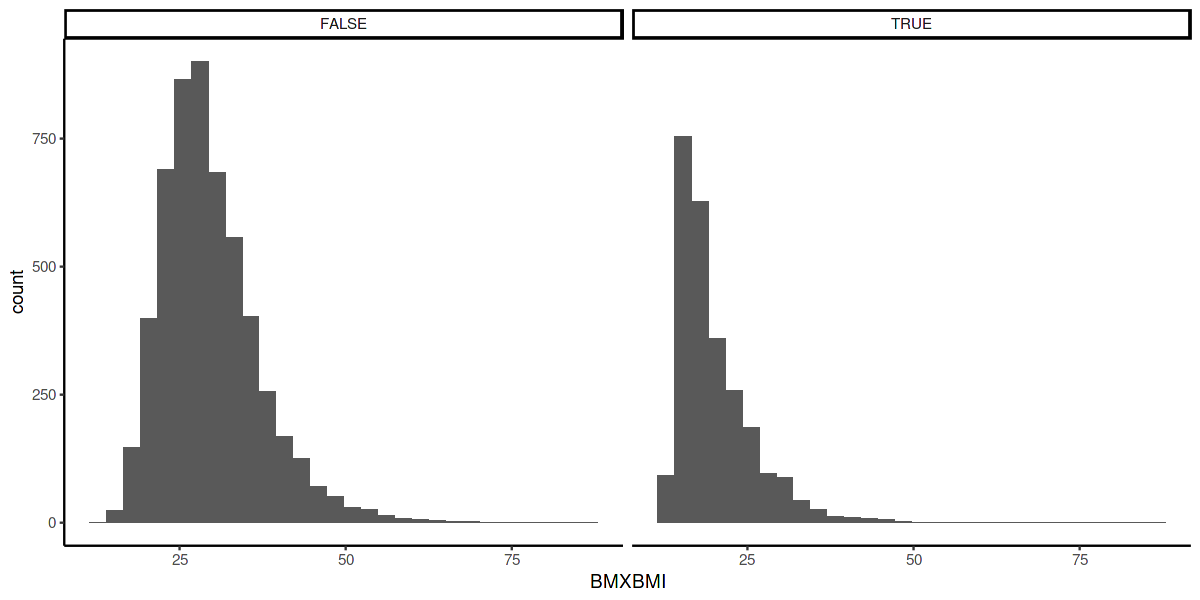

In [5]:
demo_df %>% left_join(bmx_df) %>% mutate(child = RIDAGEYR < 18) %>% 
    ggplot() + geom_histogram(aes(x = BMXBMI)) + facet_grid(~ child)

In [7]:
# blood glucose levels?
nhanesSearch("glucose")

Variable.Name,Variable.Description,Data.File.Name,Data.File.Description,Begin.Year,EndYear,Component,Use.Constraints
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTDBL2MN,Time from fasting glucose & OGTT (min),OGTT_E,Oral Glucose Tolerance Test,2007,2008,Laboratory,None
GTDDR1MN,Time from fast glucose & challenge (min),OGTT_E,Oral Glucose Tolerance Test,2007,2008,Laboratory,None
GTDDR2MN,Time from glucose challenge & OGTT(min),OGTT_E,Oral Glucose Tolerance Test,2007,2008,Laboratory,None
GTXDRANK,Amount of glucose challenge drank,OGTT_E,Oral Glucose Tolerance Test,2007,2008,Laboratory,None
LBXGLUSI,Plasma glucose: SI(mmol/L),LAB10AM,"Plasma Fasting Glucose, Serum C-peptide & Insulin",1999,2000,Laboratory,None
LBXGLT,Two hour oral glucose tolerance (OGTT) (mg/dL),OGTT_D,Oral Glucose Tolerance Test,2005,2006,Laboratory,None
LBDGLUSI,Plasma glucose: SI(mmol/L),L10AM_C,"Plasma Fasting Glucose, Serum C-peptide & Insulin",2003,2004,Laboratory,None
LBXGLUSI,Plasma glucose: SI(mmol/L),L10AM_B,"Plasma Fasting Glucose, Serum C-peptide & Insulin",2001,2002,Laboratory,None
LB2GLU,Plasma glucose (mg/dL),L10_2_B,"Glycohemoglobin, Plasma Glucose, Serum C-peptide, & Insulin, Second Exam",2001,2002,Laboratory,None


In [8]:
nhanesCodebook('GLU_J', 'LBXGLU')

Code or Value,Value Description,Count,Cumulative,Skip to Item
<chr>,<chr>,<int>,<int>,<lgl>
47 to 451,Range of Values,2891,2891,NA
.,Missing,145,3036,NA


Warning message:
“Removed 145 rows containing non-finite values (`stat_bin()`).”


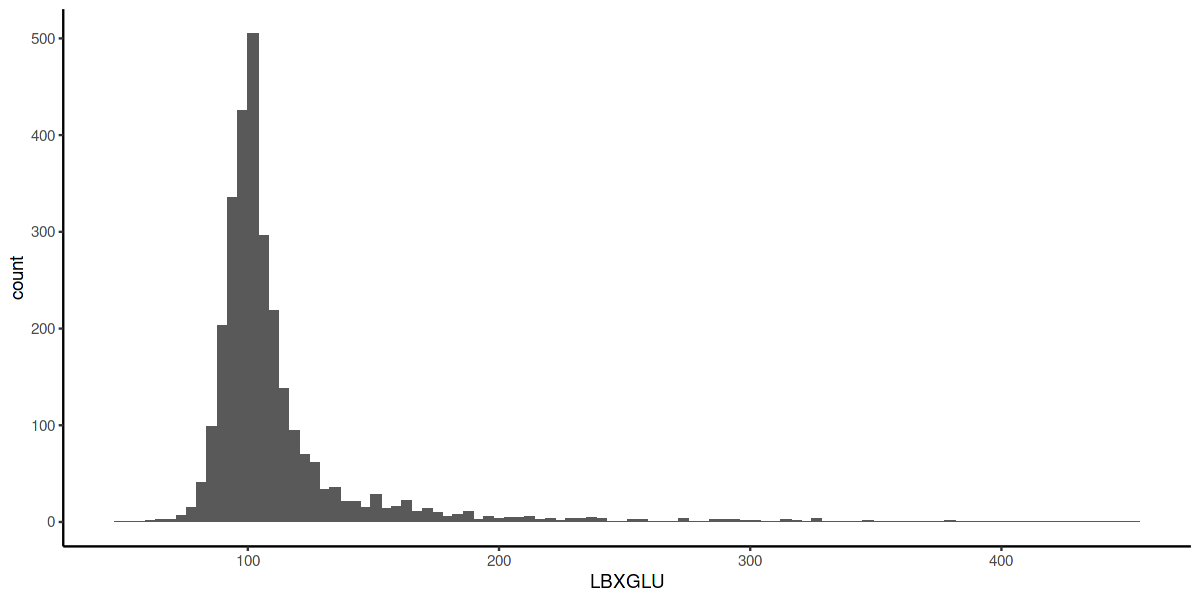

In [9]:
glu_df <- nhanes("GLU_J")
glu_df %>% ggplot + geom_histogram(aes(x=LBXGLU), bins=100)

In [10]:
nhanesCodebook('GLU_J', 'LBXGLU')

Code or Value,Value Description,Count,Cumulative,Skip to Item
<chr>,<chr>,<int>,<int>,<lgl>
47 to 451,Range of Values,2891,2891,NA
.,Missing,145,3036,NA


In [11]:
## lipid levels
nhanesSearch("LDL")

Variable.Name,Variable.Description,Data.File.Name,Data.File.Description,Begin.Year,EndYear,Component,Use.Constraints
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LBDLDL,LDL-cholesterol (mg/dL),TRIGLY_E,Cholesterol - LDL & Triglycerides,2007,2008,Laboratory,None
LBDLDLSI,LDL-cholesterol (mmol/L),TRIGLY_E,Cholesterol - LDL & Triglycerides,2007,2008,Laboratory,None
LBDLDL,LDL-cholesterol (mg/dL),LAB13AM,Cholesterol - LDL & Triglycerides,1999,2000,Laboratory,None
LBDLDLSI,LDL-cholesterol (mmol/L),LAB13AM,Cholesterol - LDL & Triglycerides,1999,2000,Laboratory,None
LB2LDL,LDL-cholesterol (mg/dL),l13_2_b,"Cholesterol - Total, HDL, LDL & Triglycerides, Second Exam",2001,2002,Laboratory,None
LB2LDLSI,LDL-cholesterol (mmol/L),l13_2_b,"Cholesterol - Total, HDL, LDL & Triglycerides, Second Exam",2001,2002,Laboratory,None
LBDLDL,LDL-cholesterol (mg/dL),TRIGLY_D,"Cholesterol - LDL, Triglyceride & Apoliprotein (ApoB)",2005,2006,Laboratory,None
LBDLDLSI,LDL-cholesterol (mmol/L),TRIGLY_D,"Cholesterol - LDL, Triglyceride & Apoliprotein (ApoB)",2005,2006,Laboratory,None
LBDLDL,LDL-cholesterol (mg/dL),L13AM_C,Cholesterol - LDL & Triglycerides,2003,2004,Laboratory,None


In [12]:
chol_df <- nhanes("TRIGLY_J")
# head(chol_df)

# ntile(chol_df$LBDLDL, 100) %>% head
# ntile(log(chol_df$LBDLDLSI), 100) %>% head


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 228 rows containing non-finite values (`stat_bin()`).”


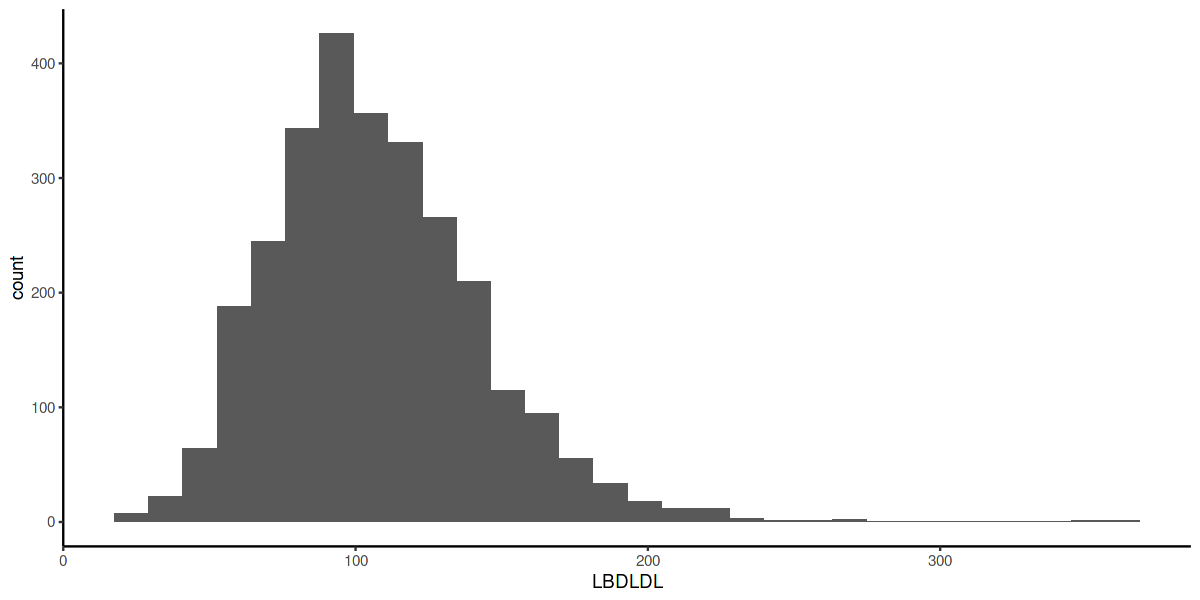

In [13]:
chol_df %>% ggplot + geom_histogram(aes(x=LBDLDL))

In [14]:
# blood pressure
bpx_df = nhanes('BPX_J')

Warning message:
“Removed 2402 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2402 rows containing non-finite values (`stat_bin()`).”


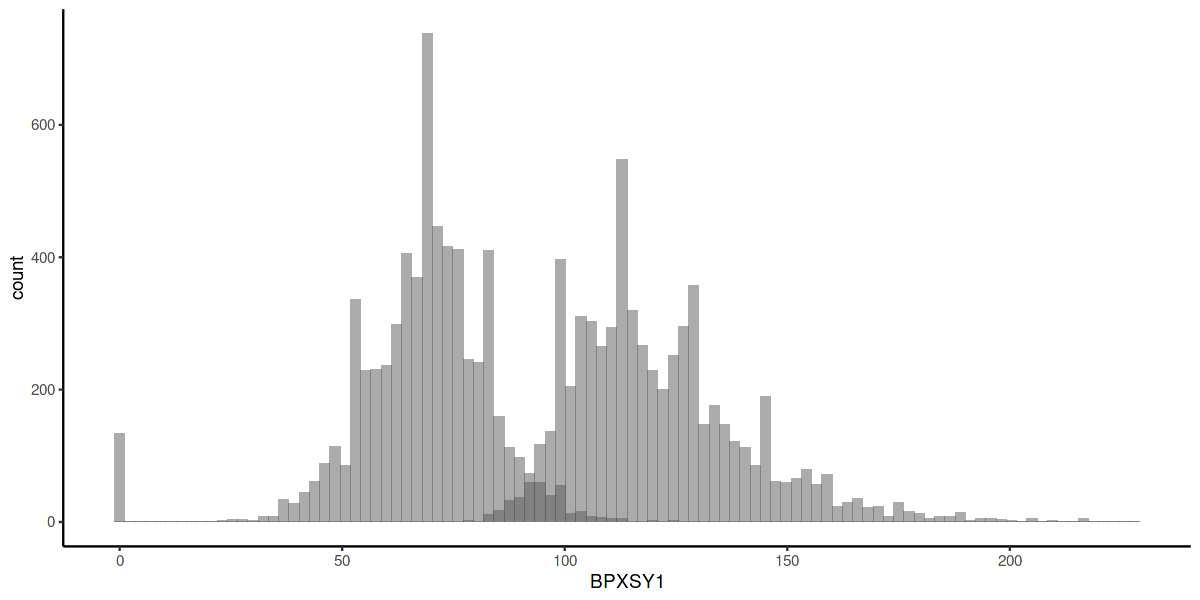

In [15]:
bpx_df %>% ggplot +
    geom_histogram(aes(x=BPXSY1), alpha=0.5, bins=100) + 
    geom_histogram(aes(x=BPXDI1), alpha=0.5, bins=100)

Let's merge everything together to form the overall health factor score:

In [16]:
hf_df <- reduce(list(demo_df, bmx_df, glu_df, chol_df, bpx_df), left_join, by = "SEQN")

hf_df

SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,⋯,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
93703,10,Both interviewed and MEC examined,Female,2,NA,Other Race - Including Multi-Racial,Non-Hispanic Asian,May 1 through October 31,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93704,10,Both interviewed and MEC examined,Male,2,NA,Non-Hispanic White,Non-Hispanic White,November 1 through April 30,33,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93705,10,Both interviewed and MEC examined,Female,66,NA,Non-Hispanic Black,Non-Hispanic Black,May 1 through October 31,NA,⋯,NA,NA,NA,NA,202,62,No,198,74,No
93706,10,Both interviewed and MEC examined,Male,18,NA,Other Race - Including Multi-Racial,Non-Hispanic Asian,May 1 through October 31,222,⋯,No,114,70,No,108,76,No,NA,NA,NA
93707,10,Both interviewed and MEC examined,Male,13,NA,Other Race - Including Multi-Racial,Other Race - Including Multi-Racial,May 1 through October 31,158,⋯,No,128,46,No,128,58,No,NA,NA,NA
93708,10,Both interviewed and MEC examined,Female,66,NA,Other Race - Including Multi-Racial,Non-Hispanic Asian,May 1 through October 31,NA,⋯,NA,138,78,No,144,76,No,144,74,No
93709,10,Both interviewed and MEC examined,Female,75,NA,Non-Hispanic Black,Non-Hispanic Black,November 1 through April 30,NA,⋯,No,118,66,No,118,68,No,NA,NA,NA
93710,10,Both interviewed and MEC examined,Female,0,11,Non-Hispanic White,Non-Hispanic White,May 1 through October 31,13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93711,10,Both interviewed and MEC examined,Male,56,NA,Other Race - Including Multi-Racial,Non-Hispanic Asian,May 1 through October 31,NA,⋯,No,94,68,No,102,64,No,NA,NA,NA


In [17]:
health_df <- hf_df %>% mutate(
    health_score = (
        ntile(BMXBMI, 100) +
        ntile(LBXGLU, 100) +
        ntile(LBDLDL, 100) +
        (ntile(BPXSY1, 100) + ntile(BPXDI1, 100)) / 2
    )
)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6795 rows containing non-finite values (`stat_bin()`).”


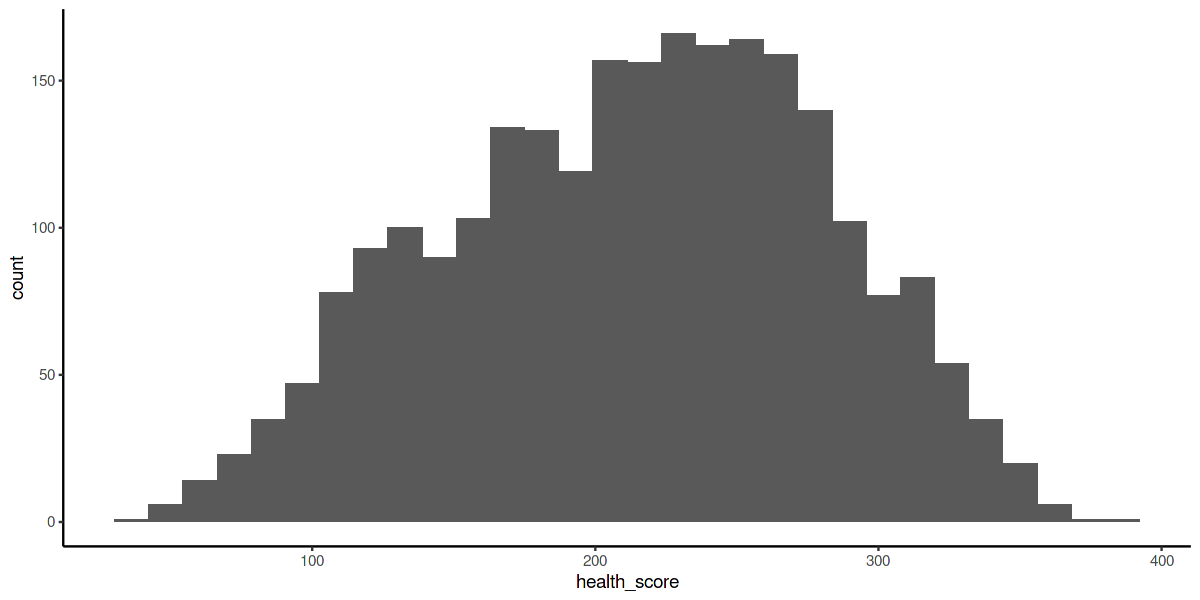

In [18]:
ggplot(health_df) + geom_histogram(aes(x = health_score))

## Behavior factors
- Recall the four behavior factors we want to measure:
    - smoking status
    - physical activity
    - diet
    - sleep
- AFAICT, the AHA does not endorse any particular way to score these. It's up to us to decide how!

In [19]:
# smoking status
smq_df = nhanes('SMQ_J')
head(smq_df)

,SEQN,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,⋯,SMQ848,SMQ852Q,SMQ852U,SMQ890,SMQ895,SMQ900,SMQ905,SMQ910,SMQ915,SMAQUEX2
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
1,93705,Yes,16,Not at all,30,Years,5,NA,NA,NA,⋯,NA,NA,NA,No,NA,No,NA,No,NA,Home Interview (18+ Yrs)
2,93706,No,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,No,NA,No,NA,No,NA,Home Interview (18+ Yrs)
3,93707,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,ACASI (12 - 17 Yrs)
4,93708,No,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,No,NA,No,NA,No,NA,Home Interview (18+ Yrs)
5,93709,Yes,15,Every day,NA,NA,NA,Within 5 minutes,30,5,⋯,NA,NA,NA,Yes,0,Yes,0,Yes,0,Home Interview (18+ Yrs)
6,93711,No,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,No,NA,No,NA,No,NA,Home Interview (18+ Yrs)


What do all these variables represent?

In [20]:
nhanesTableVars('Q', 'SMQ_J')

,Variable.Name,Variable.Description
,<chr>,<chr>
1,SEQN,Respondent sequence number.
2,SMAQUEX2,Questionnaire Mode Flag
3,SMD030,How old {were you/was SP} when {you/s/he} first started to smoke cigarettes fairly regularly?
4,SMD057,"At that time, about how many cigarettes did {you/SP} usually smoke per day?"
5,SMD093,May I please see the pack for the brand of cigarettes {you usually smoke/SP usually smokes}.
6,SMD100BR,BRAND OF CIGARETTES SMOKED BY SP (SUB-BRAND INCLUDED IF APPLICABLE AND AVAILABLE)
7,SMD100CO,CIGARETTE CARBON MONOXIDE CONTENT
8,SMD100FL,CIGARETTE PRODUCT FILTERED OR NON-FILTERED
9,SMD100LN,CIGARETTE PRODUCT LENGTH


Warning message:
“Removed 5661 rows containing non-finite values (`stat_count()`).”


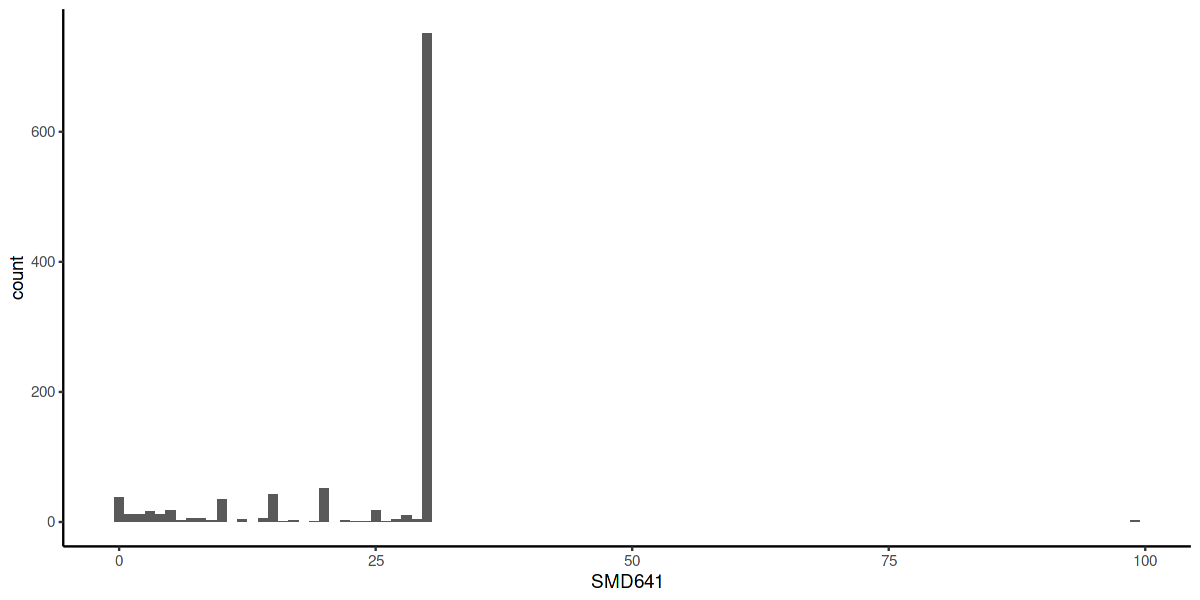

In [21]:
smq_df %>% ggplot + geom_bar(aes(x=SMD641))

(There is a weird outlier here at x=99. What does it represent?)

In [80]:
nhanesCodebook('SMQ_J', 'SMD641')

Code or Value,Value Description,Count,Cumulative,Skip to Item
<chr>,<chr>,<int>,<int>,<lgl>
0 to 30,Range of Values,1060,1060,NA
77,Refused,0,1060,NA
99,Don't know,3,1063,NA
.,Missing,5661,6724,NA


In [22]:
nhanesCodebook('SMQ_J', 'SMQ020')
smq_df %>% pluck("SMQ020") %>% table

Code or Value,Value Description,Count,Cumulative,Skip to Item
<chr>,<chr>,<int>,<int>,<chr>
1,Yes,2359,2359,
2,No,3497,5856,SMQ890
7,Refused,0,5856,SMQ890
9,Don't know,0,5856,SMQ890
.,Missing,868,6724,


.
 Yes   No 
2359 3497 

In [23]:
smq_df <- mutate(smq_df, smoking_score = ifelse(SMQ020 == 1, 100, 0))

### Physical activity

In [24]:
paq_df <- nhanes('PAQ_J')
nhanesTableVars('Q', 'PAQ_J')

,Variable.Name,Variable.Description
,<chr>,<chr>
1,PAD615,How much time {do you/does SP} spend doing vigorous-intensity activities at work on a typical day?
2,PAD630,How much time {do you/does SP} spend doing moderate-intensity activities at work on a typical day?
3,PAD645,How much time {do you/does SP} spend walking or bicycling for travel on a typical day?
4,PAD660,"How much time {do you/does SP} spend doing vigorous-intensity sports, fitness or recreational activities on a typical day?"
5,PAD675,"How much time {do you/does SP} spend doing moderate-intensity sports, fitness or recreational activities on a typical day?"
6,PAD680,"The following question is about sitting at school, at home, getting to and from places, or with friends including time spent sit"
7,PAQ605,Next I am going to ask you about the time {you spend/SP spends} doing different types of physical activity in a typical week. Th
8,PAQ610,"In a typical week, on how many days {do you/does SP} do vigorous-intensity activities as part of {your/his/her} work?"
9,PAQ620,Does {your/SP's} work involve moderate-intensity activity that causes small increases in breathing or heart rate such as brisk w


In [25]:
nhanesCodebook('PAQ_J', 'PAD680')

Code or Value,Value Description,Count,Cumulative,Skip to Item
<chr>,<chr>,<int>,<int>,<lgl>
0 to 1320,Range of Values,5811,5811,NA
7777,Refused,0,5811,NA
9999,Don't know,35,5846,NA
.,Missing,10,5856,NA


In [26]:
paq_df <- paq_df %>% filter(PAD680 < 1400) %>% mutate(activity_score = ntile(PAD680, 100))

## Diet
- In my research this one was the most complicated to define.
- Several studies ([example](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7284419/#:~:text=The%20DASH%20score%20is%20divided,were%20reported%20per%201000%20kcal.)) use the DASH scoring system. 
- It was hard to figure out what the DASH equation actually is.

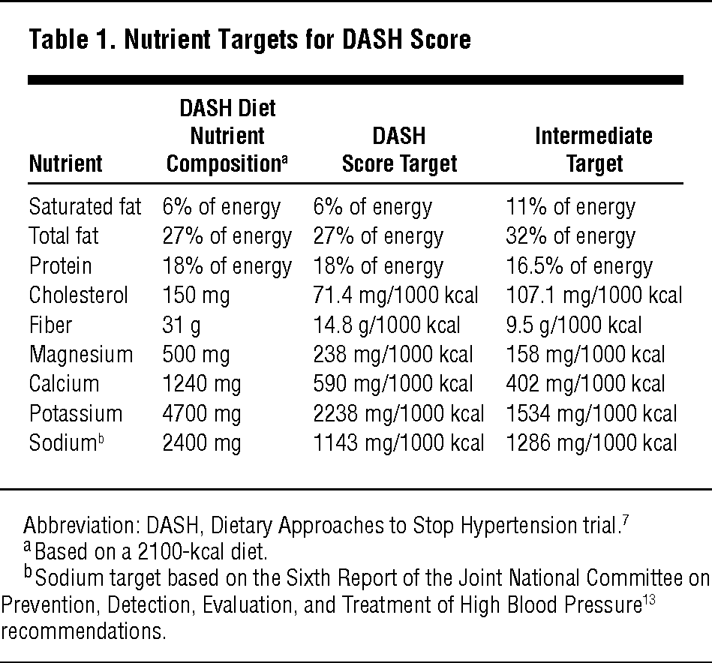

In [27]:
diet_df <- nhanes('DR1TOT_J')
nhanesTableVars('DIET', 'DR1TOT_J')

,Variable.Name,Variable.Description
,<chr>,<chr>
1,DBD100,How often {do you/does SP} add this salt to {your/his/her/SP's} food at the table? Would you say . . .
2,DBQ095Z,What type of salt {do you/does SP} usually add to {your/his/her/SP's} food at the table? Would you say . . .
3,DR1_300,"Was the amount of food that {you/NAME} ate yesterday much more than usual, usual, or much less than usual?"
4,DR1_320Z,"Total plain water drank yesterday - including plain tap water, water from a drinking fountain, water from a water cooler, bottle"
5,DR1_330Z,Total tap water drank yesterday - including filtered tap water and water from a drinking fountain.
6,DR1BWATZ,Total bottled water drank yesterday (gm)
7,DR1DAY,Intake day of the week
8,DR1DBIH,Number of days between intake day and the day of family questionnaire administered in the household.
9,DR1DRSTZ,Dietary recall status


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1220 rows containing non-finite values (`stat_bin()`).”


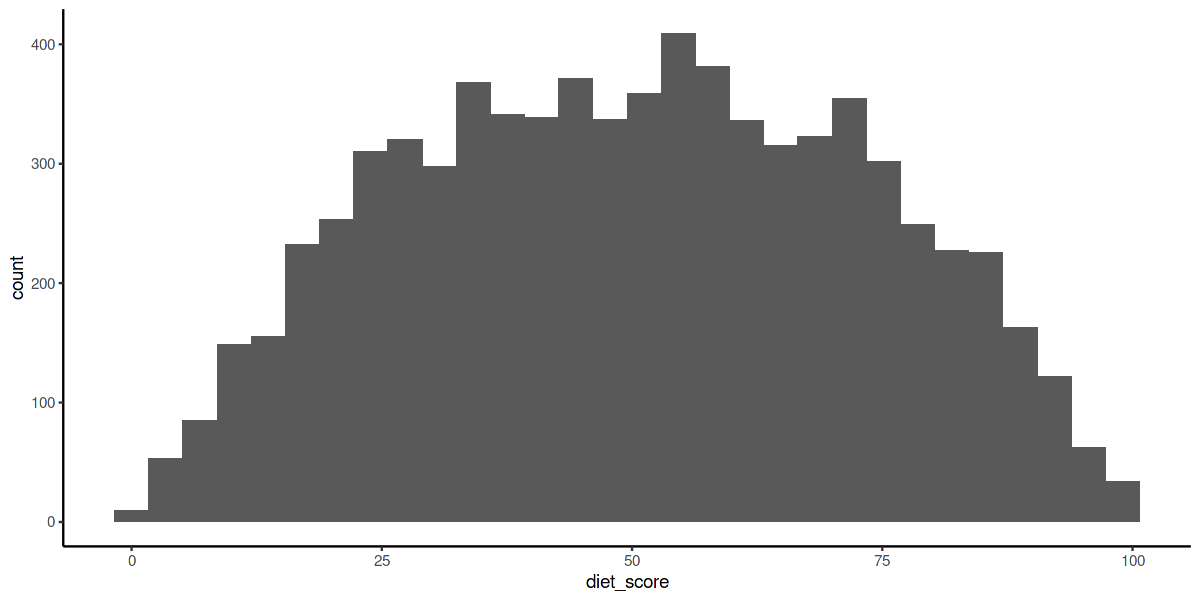

In [28]:
diet_df <- diet_df %>% mutate(
    diet_score = (
        ntile(DR1TSODI, 100) +
        ntile(DR1TSFAT, 100) +
        ntile(DR1TCHOL, 100) + 
        ntile(DR1TSUGR, 100)
    ) / 4
)

ggplot(diet_df) + geom_histogram(aes(x = diet_score))

## Sleep

In [29]:
nhanesSearch('sleep')

Variable.Name,Variable.Description,Data.File.Name,Data.File.Description,Begin.Year,EndYear,Component,Use.Constraints
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ENQ010,{Do you/Does SP} currently have a breathing problem that requires {you/him/her} to use supplemental oxygen during the day? [This,SPX_E,Spirometry - Pre and Post-Bronchodilator,2007,2008,Examination,None
ENQ010,{Do you/Does SP} currently have a breathing problem that requires {you/him/her} to use supplemental oxygen during the day? [This,SPX_F,Spirometry - Pre and Post-Bronchodilator,2009,2010,Examination,None
ENQ010,{Do you/Does SP} currently have a breathing problem that requires {you/him/her} to use supplemental oxygen during the day? [This,SPX_G,Spirometry - Pre and Post-Bronchodilator,2011,2012,Examination,None
PAXAISMD,Day count: 80hz data in idle sleep mode,PAXDAY_G,Physical Activity Monitor - Day,2011,2012,Examination,None
PAXSWMD,Day sum: valid sleep wear minutes,PAXDAY_G,Physical Activity Monitor - Day,2011,2012,Examination,None
PAXAISMH,Hour count: 80hz data in idle sleep mode,PAXHR_G,Physical Activity Monitor - Hour,2011,2012,Examination,None
PAXSWMH,Hour sum: valid sleep wear minutes,PAXHR_G,Physical Activity Monitor - Hour,2011,2012,Examination,None
PAXAISMM,Minute count: 80hz data in idle sleep mode,PAXMIN_G,Physical Activity Monitor - Minute,2011,2012,Examination,None
PAXPREDM,Estimated wake/sleep/wear status during the minute,PAXMIN_G,Physical Activity Monitor - Minute,2011,2012,Examination,None


In [30]:
nhanesTableVars('Q', 'SLQ_J')

,Variable.Name,Variable.Description
,<chr>,<chr>
1,SEQN,Respondent sequence number.
2,SLD012,Number of hours usually sleep on weekdays or workdays.
3,SLD013,Number of hours usually sleep on weekends or non-workdays.
4,SLQ030,"In the past 12 months, how often did {you/SP} snore while {you were/s/he was} sleeping?"
5,SLQ040,"In the past 12 months, how often did {you/SP} snort, gasp, or stop breathing while {you were/s/he was} asleep?"
6,SLQ050,{Have you/Has SP} ever told a doctor or other health professional that {you have/s/he has} trouble sleeping?
7,SLQ120,"In the past month, how often did {you/SP} feel excessively or overly sleepy during the day?"
8,SLQ300,What time {do you/does SP} usually fall asleep on weekdays or workdays?
9,SLQ310,What time {do you/does SP} usually wake up on weekdays or workdays?


Warning message:
“Removed 71 rows containing non-finite values (`stat_bin()`).”


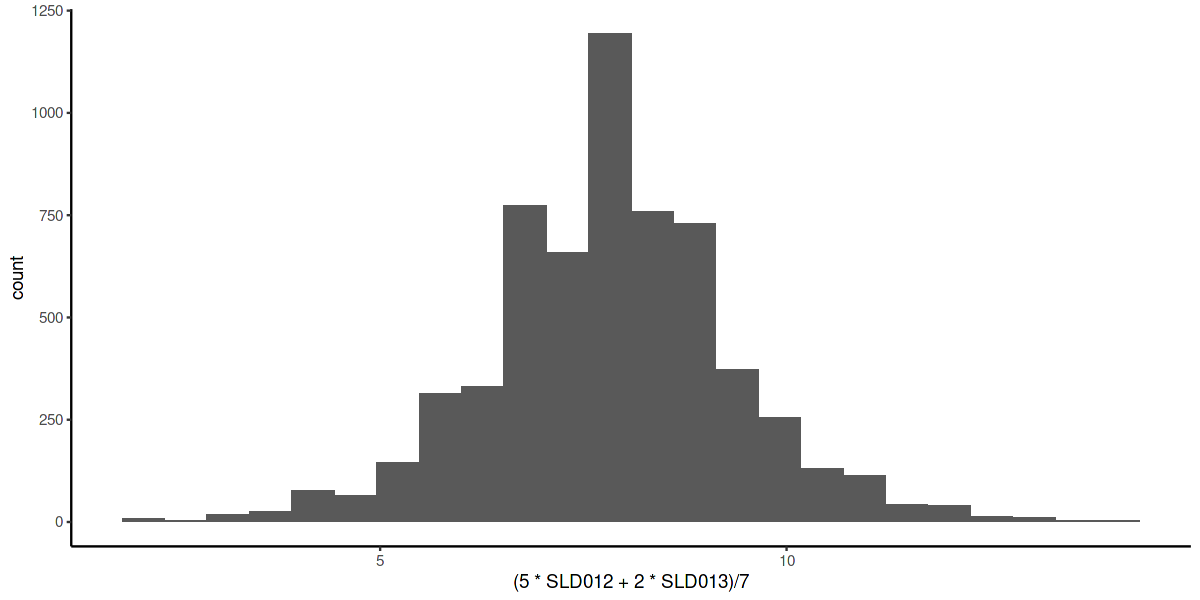

In [31]:
sl_df <- nhanes("SLQ_J")
ggplot(sl_df) + geom_histogram(aes(x = (5 * SLD012 + 2 * SLD013) / 7), bins=24)

In [32]:
sl_df <- mutate(sl_df, sleep_score = 100 - ntile(5 * SLD012 + 2 * SLD013, 100))

In [33]:
behav_df <- reduce(list(smq_df, diet_df, paq_df, sl_df), left_join, by="SEQN") %>% 
    mutate(behavior_score = (smoking_score + diet_score + activity_score + sleep_score))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1823 rows containing non-finite values (`stat_bin()`).”


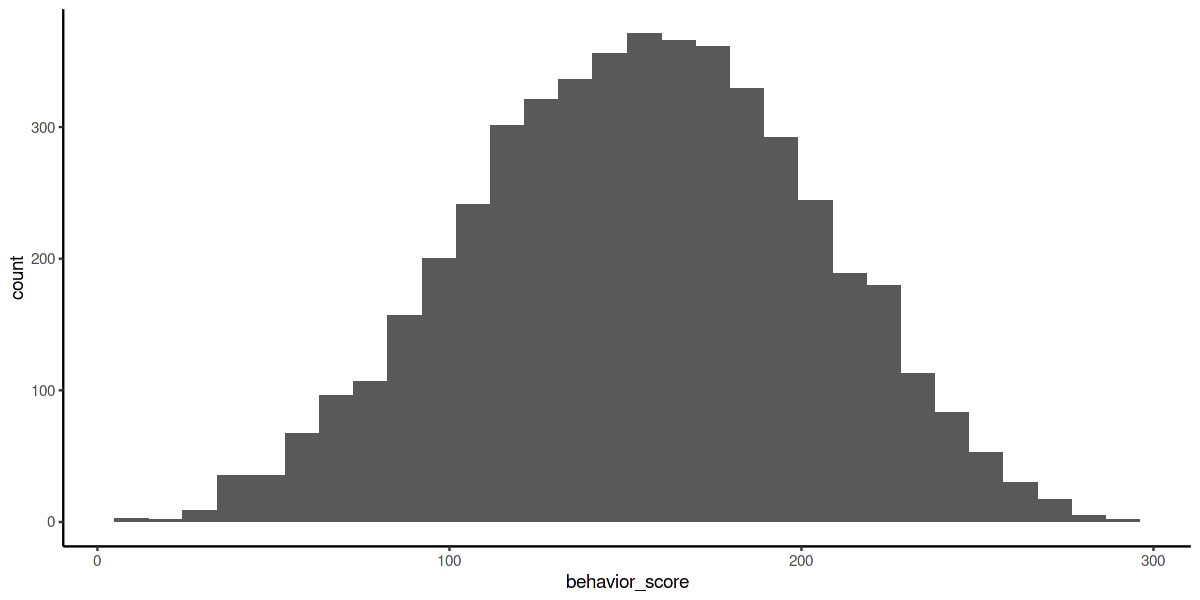

In [34]:
ggplot(behav_df) + geom_histogram(aes(x=behavior_score))

Joining with `by = join_by(SEQN)`
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


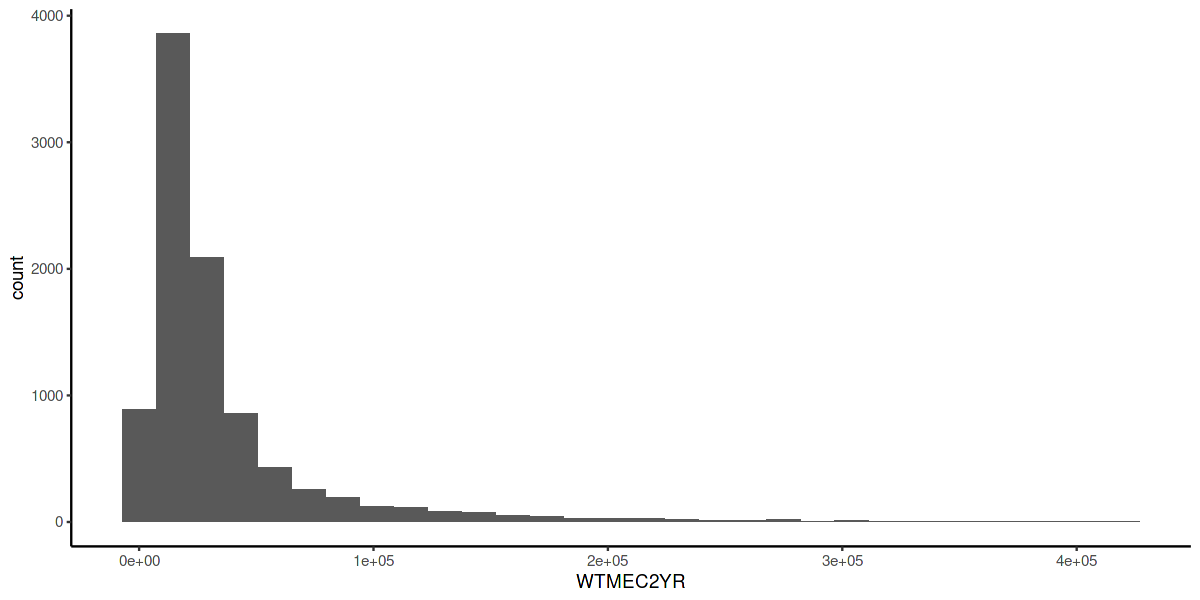

In [35]:
combined_df <- left_join(health_df, behav_df) %>% 
    mutate(lh8_score = (health_score + behavior_score) / 8)

combined_df %>% ggplot + geom_histogram(aes(x=WTMEC2YR))

Warning message:
“Removed 7285 rows containing non-finite values (`stat_bin()`).”


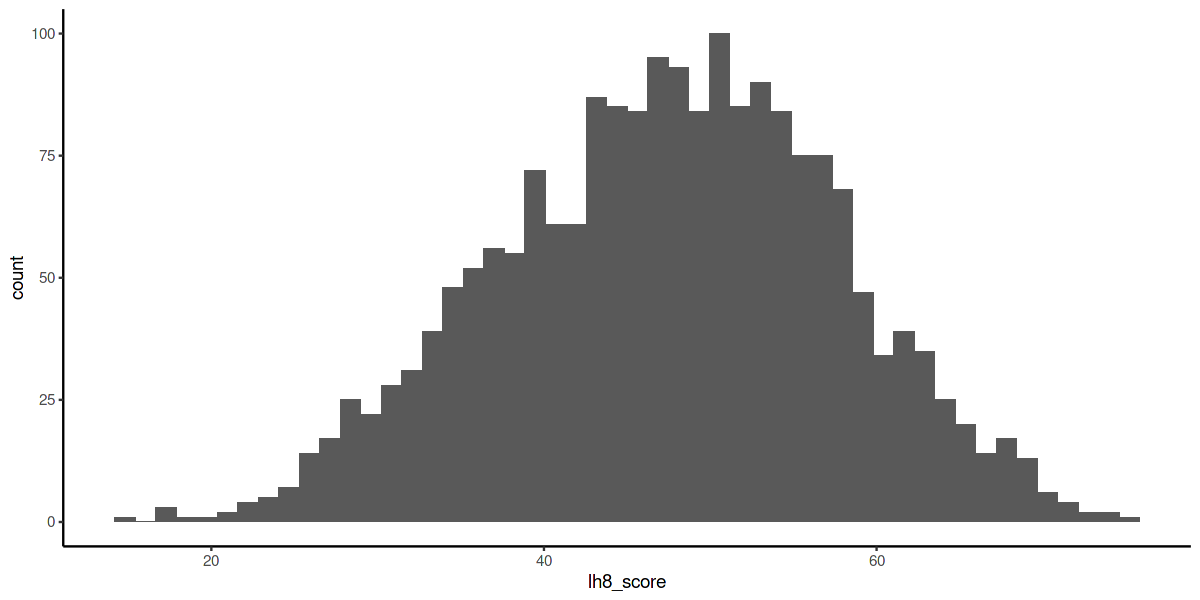

In [36]:
ggplot(combined_df) + geom_histogram(aes(x=lh8_score), bins=50)

## Correctly accounting for survey weights
- Remember that the NHANES data have a complicated weighting procedure. 
- ([Tutorial](https://wwwn.cdc.gov/nchs/nhanes/tutorials/weighting.aspx))
- We will use the built-in survey package to handle survey weights.

In [37]:
library(survey)

nhanesDesign <- svydesign(id = ~SDMVPSU,  # Primary Sampling Units (PSU)
                          strata  = ~SDMVSTRA, # Stratification used in the survey
                          weights = ~WTMEC2YR,   # Survey weights
                          nest    = TRUE,      # Whether PSUs are nested within strata
                          data    = combined_df)

Loading required package: grid

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart




In [39]:
# subset survey design object
dfsub = base::subset(nhanesDesign, combined_df$RIDAGEYR>=40)

# subset the original dataset
filtsub = filter(combined_df, RIDAGEYR>=40)

Let's see what this package does by comparing the adjusted and unadjusted means:

In [40]:
filtsub %>% summarize(mean(RIDAGEYR, na.rm=T))

svymean(~ RIDAGEYR, dfsub, na.rm=TRUE) # adjusted means

"mean(RIDAGEYR, na.rm = T)"
<dbl>
61.00515


           mean     SE
RIDAGEYR 58.989 0.4128

big difference!

### Quantiles
Similar to means, you get a (slightly) different answer depending on whether you account for weights or not:

In [41]:
quantile(combined_df$lh8_score, c(0.25,0.5,.75), na.rm = TRUE)

svyquantile(~ lh8_score, nhanesDesign, quantiles = c(0.25,0.5,0.75), na.rm=TRUE)

25%      50%      75% 
40.21875 47.87500 54.62500

$lh8_score
     quantile   ci.2.5  ci.97.5        se
0.25 40.21875 39.12500 41.96875 0.6670930
0.5  48.03125 46.84375 49.21875 0.5571326
0.75 54.93750 54.06250 55.96875 0.4471722

attr(,"hasci")
[1] TRUE
attr(,"class")
[1] "newsvyquantile"

### Survey regression
There is a special type of GLM that we can use to do regression with survey data. Compare:

In [42]:
lm(lh8_score ~ RIDAGEYR, data = combined_df) %>% summary


Call:
lm(formula = lh8_score ~ RIDAGEYR, data = combined_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.9898  -6.8566   0.2418   6.8750  30.1154 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.06613    0.63494   63.10   <2e-16 ***
RIDAGEYR     0.14916    0.01206   12.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.802 on 1967 degrees of freedom
  (7285 observations deleted due to missingness)
Multiple R-squared:  0.0722,	Adjusted R-squared:  0.07172 
F-statistic: 153.1 on 1 and 1967 DF,  p-value: < 2.2e-16


In [369]:
lm(lh8_score ~ RIDAGEYR + RIAGENDR * RIDRETH1, data = combined_df) %>% summary

# combined_df %>% colnames


Call:
lm(formula = lh8_score ~ RIDAGEYR + RIAGENDR * RIDRETH1, data = combined_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.4319  -6.7595   0.1974   6.4489  28.8506 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                                42.59300    0.97917
RIDAGEYR                                                    0.14547    0.01195
RIAGENDRFemale                                             -4.70509    1.13634
RIDRETH1Other Hispanic                                     -1.48702    1.36707
RIDRETH1Non-Hispanic White                                  0.09455    0.96568
RIDRETH1Non-Hispanic Black                                 -1.02642    1.04833
RIDRETH1Other Race - Including Multi-Racial                -0.60683    1.09841
RIAGENDRFemale:RIDRETH1Other Hispanic                       2.04653    1.84306
RIAGENDRFemale:RIDRETH1Non-Hispanic White                  -0.11561    1.35008
RIAGEND

### Interesting questions we can ask using these scores?

Warning message:
“Removed 3890 rows containing missing values (`geom_point()`).”


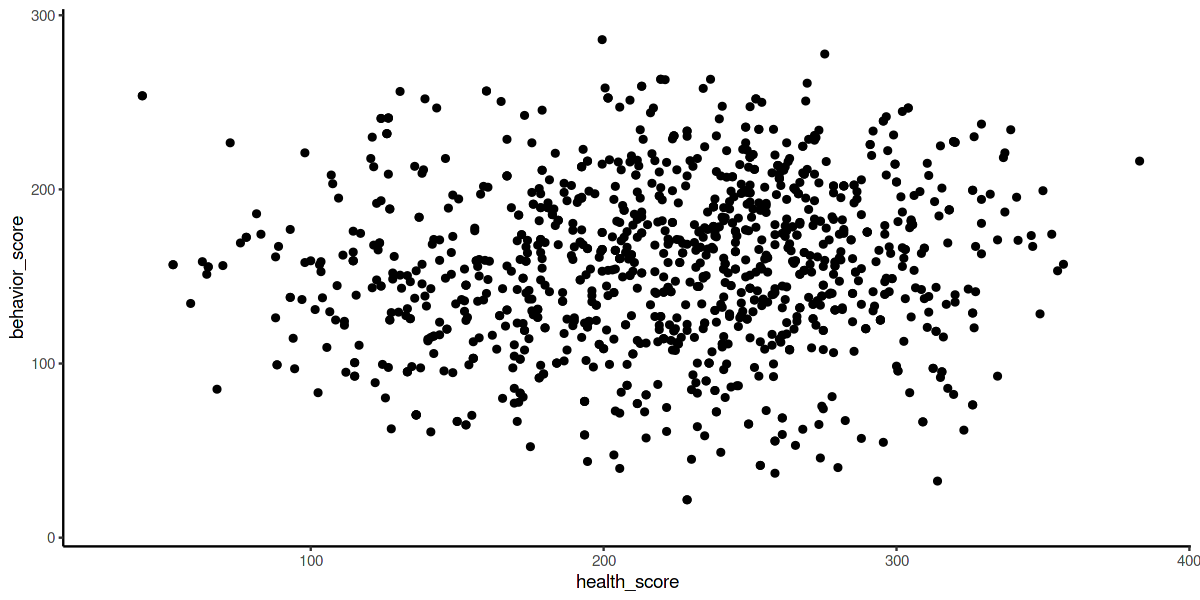

In [268]:
sdf <- sample_n(combined_df, replace=T, 5000, weights=WTMEC2YR) 
sdf %>% ggplot + geom_point(aes(x=health_score, y=behavior_score))

In [269]:
# how correlated are health_score and behavior_score?
lm(health_score ~ behavior_score, sdf) %>% summary


Call:
lm(formula = health_score ~ behavior_score, data = sdf)

Residuals:
    Min      1Q  Median      3Q     Max 
-190.12  -41.58    8.18   42.49  154.52 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    204.6324     6.2533  32.724  < 2e-16 ***
behavior_score   0.1103     0.0382   2.887  0.00397 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 60.05 on 1108 degrees of freedom
  (3890 observations deleted due to missingness)
Multiple R-squared:  0.007466,	Adjusted R-squared:  0.00657 
F-statistic: 8.334 on 1 and 1108 DF,  p-value: 0.003966


Warning message:
“Removed 3890 rows containing non-finite values (`stat_boxplot()`).”


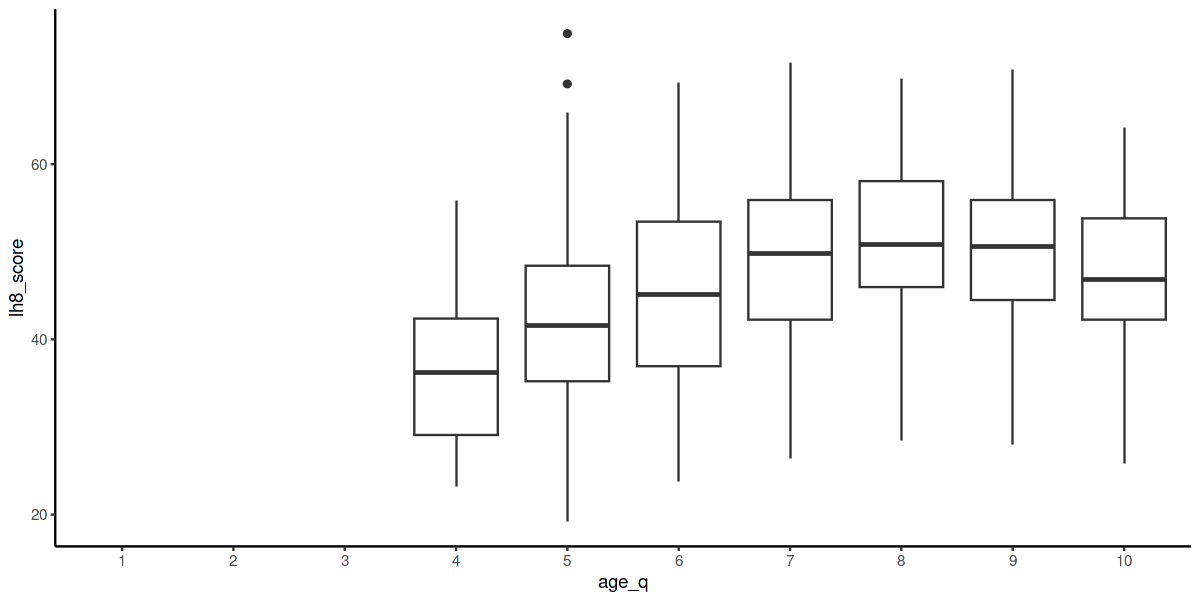

In [270]:
# health scores by age range
sdf  %>% mutate(age_q = factor(ntile(RIDAGEYR, 10))) %>% 
    ggplot + geom_boxplot(aes(x=age_q, y=lh8_score))

Warning message:
“Removed 3890 rows containing non-finite values (`stat_boxplot()`).”


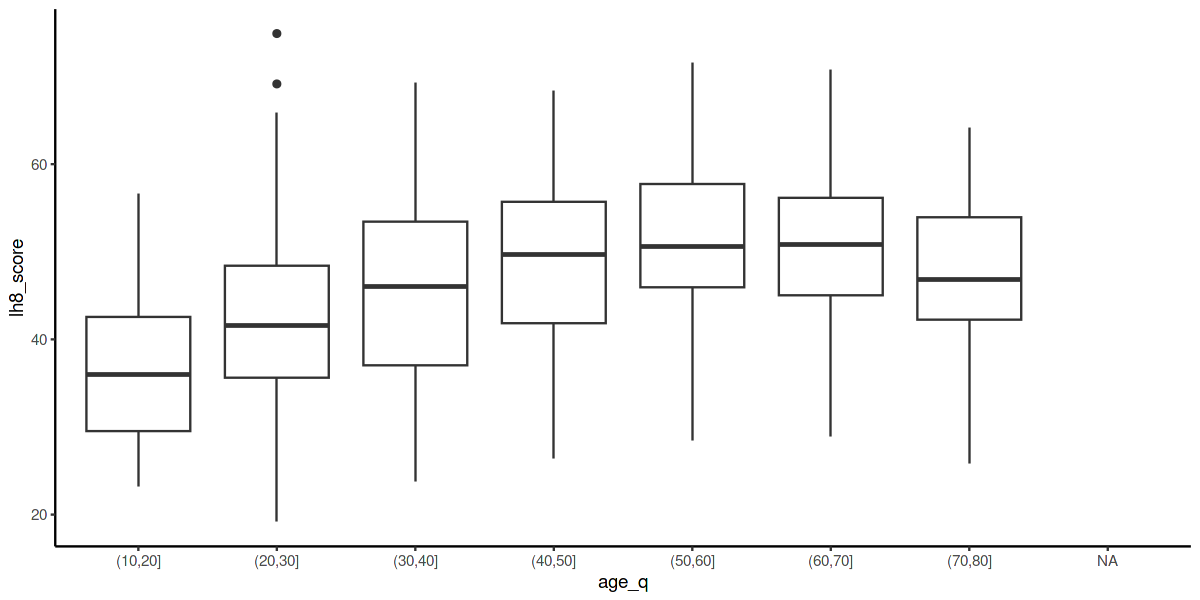

In [271]:
# health scores by age range
sdf %>% mutate(age_q = cut(RIDAGEYR, seq(10, 100, 10))) %>% 
    ggplot + geom_boxplot(aes(x=age_q, y=lh8_score))

Warning message:
“Removed 3890 rows containing non-finite values (`stat_boxplot()`).”


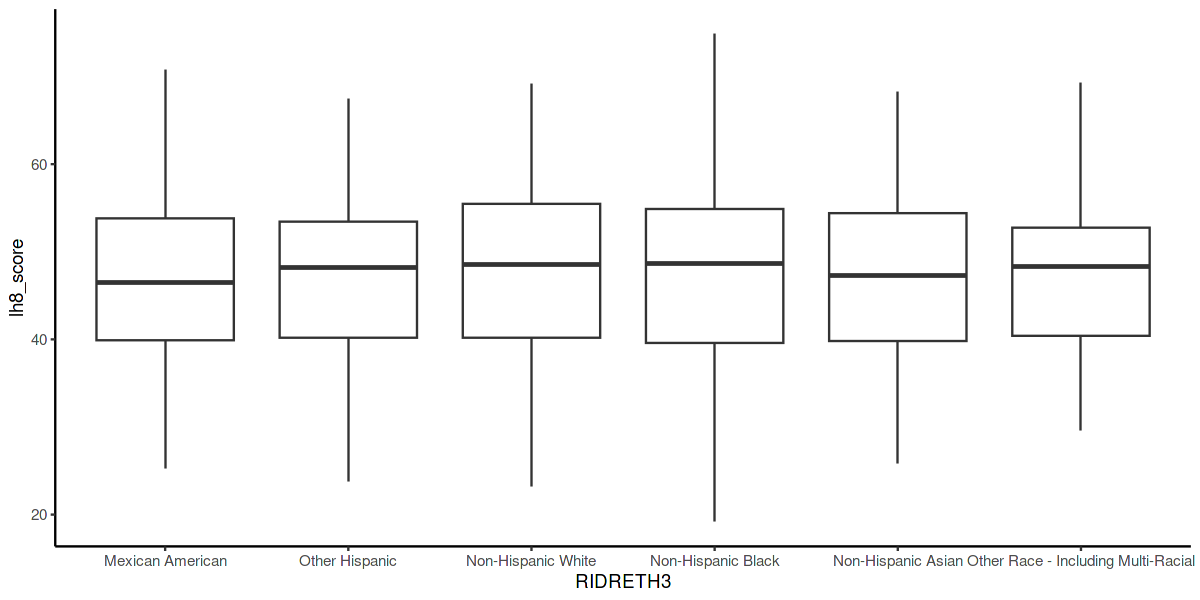

In [272]:
# health scores by age range
sdf %>% 
    ggplot + geom_boxplot(aes(x=RIDRETH3, y=lh8_score))

Warning message:
“Removed 3890 rows containing non-finite values (`stat_boxplot()`).”


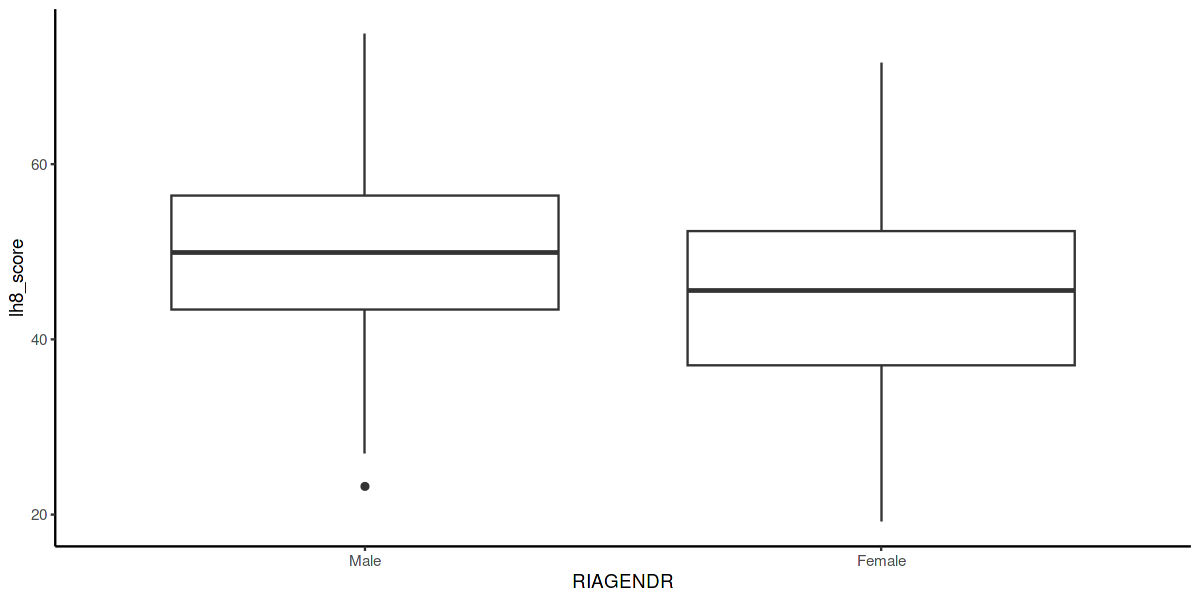

In [273]:
# health scores by age range
sdf %>% 
    ggplot + geom_boxplot(aes(x=RIAGENDR, y=lh8_score))